In [155]:
import numpy as np
from scipy.linalg import expm
import afqmc
import importlib
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time


importlib.reload(afqmc)
from afqmc import *

In [156]:
# 使用例
U = 1
mu = U / 2
L = 100
N = 100
dimension = 1
size = N**dimension
# s = -np.ones((L, size))
# sはL×Nの行列で、要素は1か-1
s = np.random.choice([-1, 1], size=(L, size))
p = {
    "N": N,
    "L": L,
    "beta": 5,
    "t": 1.0,
    "U": U,
    "mu": mu,
    "s": s,
    "dimension": dimension,
}

In [157]:
afqmc = AFQMC(**p)

In [158]:
n_stab = 5
M = 10
Szz_x = np.zeros(N)
for m in range(M):
    print(m)
    for l in reversed(range(L)):
        if l % n_stab == 0:
            afqmc.stabilize(l)
        afqmc.i_sweep(l)
        afqmc.time_update_green_function(l)
    if m > 3:
        Szz_x += np.array([afqmc.Szz(i) for i in range(N)])

Szz_x /= M - 4

0
1
2
3
4
5
6
7
8
9


In [159]:
np.sum(afqmc.s)

84

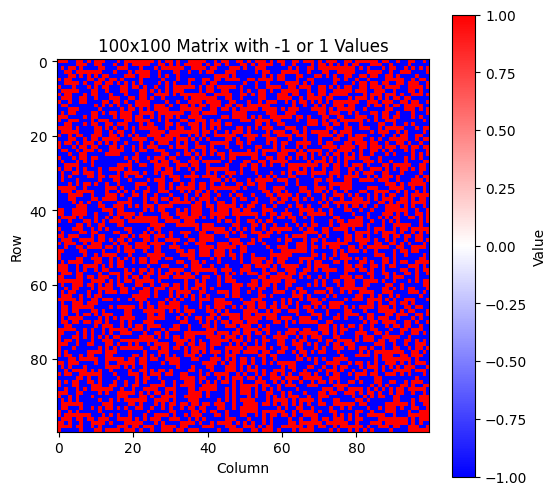

In [160]:
import matplotlib.pyplot as plt

# matplotlibのサブプロット機能を使用して、-1または1の乱数を含む5x5行列をプロット
fig, ax = plt.subplots(figsize=(6, 6))

# 行列のプロット
cax = ax.imshow(afqmc.s, cmap="bwr", interpolation="none")

# カラーバーの追加
fig.colorbar(cax, ax=ax, label="Value")

# タイトルと軸ラベルの設定
ax.set_title(f"{N}x{N} Matrix with -1 or 1 Values")
ax.set_xlabel("Column")
ax.set_ylabel("Row")

# プロットの表示
plt.show()

In [161]:
import matplotlib.pyplot as plt

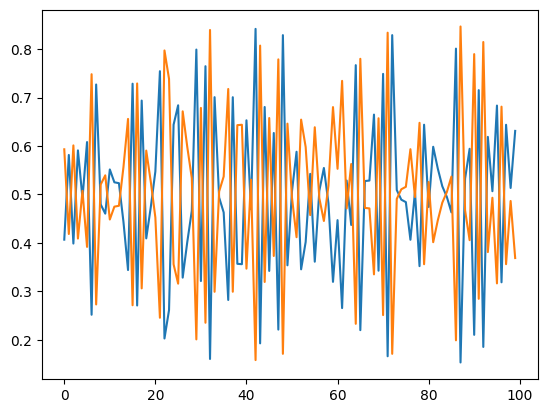

In [162]:
fig, ax = plt.subplots()
ax.plot(np.diag(afqmc.G_up[L // 2]))
ax.plot(np.diag(afqmc.G_dn[L // 2]))

In [163]:
(np.trace(afqmc.G_up[L // 2]) + np.trace(afqmc.G_dn[L // 2])) / size

1.000000000000378

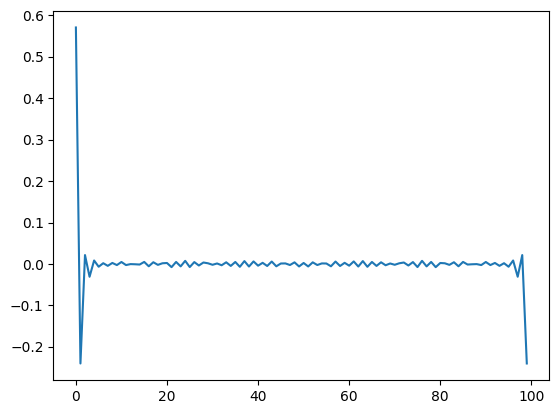

In [164]:
fig, ax = plt.subplots()
ax.plot(Szz_x)
# ax.set_ylim([-1e100, 1e100])

In [165]:
afqmc.make_Szz_pipi()

0.009657329697254493